# IMPORTS

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate

# EDA

In [23]:
column_names = ['itemID', 'userID', 'rating', 'unixTime']
dataset = pd.read_csv("../datasets/Arts_Crafts_and_Sewing.csv", header=None)
dataset.columns = column_names
dataset = dataset.sort_values(by='unixTime')
dataset.head(3)

,itemID,userID,rating,unixTime
339,0848724666,A1GQNHNSSQSH8U,5.0,893462400
338,0848724666,ANING5CFNQ5SR,5.0,909964800
520,0930113187,A5DLIHAPW697S,1.0,935884800


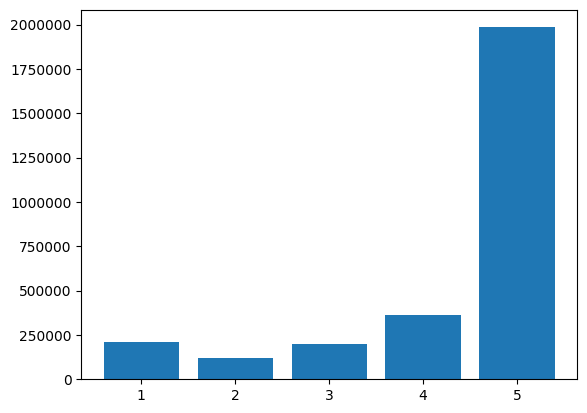

In [87]:
# Распределение оценок
counts = dataset['rating'].value_counts().to_list()
rating_names = dataset['rating'].value_counts().index.to_list()
plt.bar(rating_names, counts)
plt.ticklabel_format(scilimits=(1, 7))
plt.show()

In [80]:
# Количество уникальных товаров
len(dataset['itemID'].unique())

302809

In [88]:
# Количество уникальных пользователей
len(dataset['userID'].unique())

1579230

# Baseline (SVD) Cross Validation With Surprise Lib

In [39]:
reader = Reader(line_format="item user rating timestamp", rating_scale=(1,5),  sep=",")
data = Dataset.load_from_file(file_path="../datasets/Arts_Crafts_and_Sewing.csv", reader=reader)
cross_validate(SVD(),data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1024  1.1069  1.1054  1.1085  1.1040  1.1054  0.0021  
MAE (testset)     0.7992  0.8029  0.8020  0.8034  0.8011  0.8017  0.0015  
Fit time          113.27  110.16  108.94  110.67  115.17  111.64  2.26    
Test time         29.09   18.72   13.29   13.38   18.85   18.67   5.75    


{'test_rmse': array([1.10239539, 1.10687806, 1.10542096, 1.10851411, 1.10397814]),
 'test_mae': array([0.7992441 , 0.80289754, 0.80197549, 0.80342259, 0.80109089]),
 'fit_time': (113.2733268737793,
  110.1550965309143,
  108.94468927383423,
  110.66981863975525,
  115.17165565490723),
 'test_time': (29.087817192077637,
  18.718040704727173,
  13.285956621170044,
  13.38286566734314,
  18.85197377204895)}